In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


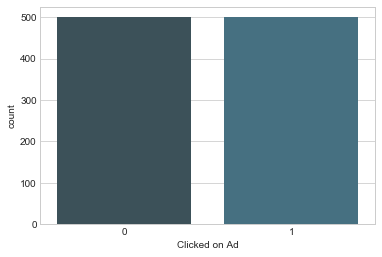

In [5]:
sns.countplot(df['Clicked on Ad'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [14]:
df['Ad Topic Line'].sample(5)

964    Multi-lateral multi-state encryption
160         Networked foreground definition
286         Re-engineered real-time success
707     Multi-channeled 3rdgeneration model
216             Progressive 24hour forecast
Name: Ad Topic Line, dtype: object

In [15]:
df['Country'].value_counts().head(10)

Czech Republic    9
France            9
Liberia           8
Senegal           8
Cyprus            8
Micronesia        8
Turkey            8
Peru              8
Greece            8
Australia         8
Name: Country, dtype: int64

In [17]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [18]:
df.drop(['Ad Topic Line', 'City', 'Country'], axis=1 , inplace=True)

In [19]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [20]:
y = df['Clicked on Ad']
X = df.drop(['Clicked on Ad', 'Timestamp'], axis=1)

In [21]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lm = LogisticRegression()

In [26]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
test_predictions = lm.predict(X_test)
train_predictions = lm.predict(X_train)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print("Train Metrics:")
print(classification_report(y_train, train_predictions))

Train Metrics:
             precision    recall  f1-score   support

          0       0.88      0.93      0.91       354
          1       0.92      0.87      0.90       346

avg / total       0.90      0.90      0.90       700



In [30]:
print("Test Metrics:")
print(classification_report(y_test, test_predictions))

Test Metrics:
             precision    recall  f1-score   support

          0       0.84      0.97      0.90       146
          1       0.96      0.82      0.89       154

avg / total       0.90      0.89      0.89       300



In [34]:
test_proba = lm.predict_proba(X_test)

In [44]:
np.mean(test_predictions == y_test)

0.8933333333333333

In [38]:
clicked_proba = test_proba[:,1]

In [66]:
thresh_predic = np.array(clicked_proba > 0.5, dtype=np.int)

In [67]:
print(classification_report(y_test, thresh_predic))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       146
          1       0.96      0.82      0.89       154

avg / total       0.90      0.89      0.89       300



In [46]:
np.all(np.round(clicked_proba) == test_predictions)

True

In [47]:
not_clicked_proba = test_proba[:,0]

## KNN

In [71]:
train_mean = X_train.mean()
train_std = X_train.std()

In [72]:
X_train = (X_train - train_mean)/train_std
X_test = (X_test - train_mean)/train_std

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
knn_test_pred = knn.predict(X_test)
knn_train_pred = knn.predict(X_train)

In [83]:
print("Train Metrics:")
print(classification_report(y_train, knn_train_pred))

Train Metrics:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       354
          1       1.00      0.95      0.97       346

avg / total       0.97      0.97      0.97       700



In [85]:
print("Test Metrics:")
print(classification_report(y_test, knn_test_pred))

Test Metrics:
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       146
          1       0.97      0.92      0.95       154

avg / total       0.95      0.95      0.95       300



In [86]:
from sklearn.metrics import f1_score

In [87]:
f1_score(y_test, knn_test_pred)

0.9466666666666667

In [105]:
scores = []
for k in range(1, 101, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    s = f1_score(y_test, pred)
    scores.append(s)    

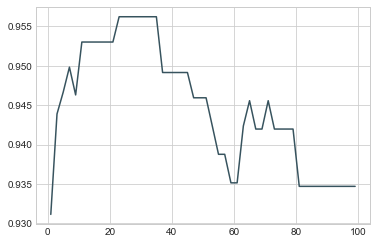

In [106]:
plt.plot(list(range(1, 101, 2)), scores)

In [107]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [108]:
print("Test Metrics:")
print(classification_report(y_test, pred))

Test Metrics:
             precision    recall  f1-score   support

          0       0.92      0.99      0.96       146
          1       0.99      0.92      0.96       154

avg / total       0.96      0.96      0.96       300

